# Example Problem:  Sudden Cooling of a Rod

This example is Chapter 4 of **Heat Transfer**, J.P. Holman.  It is example 4-11.

In the example problem, a steel rod is at an intial temperature of 200 C.  Suddenly, it is immersed in a fluid that is 40 C while one end of the rod is maintained at 200 C.  Convection transfers heat from the rod to the fluid.

## Validation Data

To make sure the code is correct, the data from the code is compared to the data from the textbook example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfValidate = pd.read_csv('SampleDataExample4-11.csv')

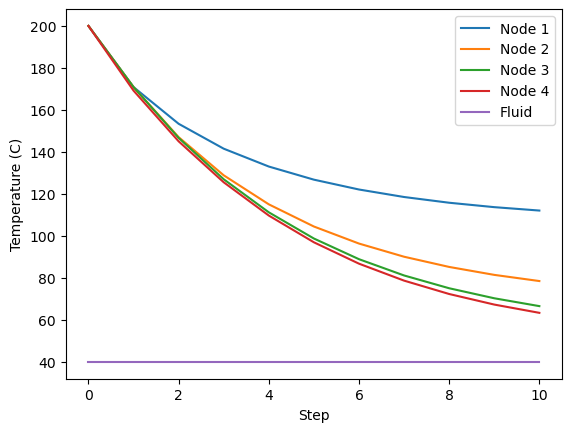

In [3]:
plt.figure()
plt.plot(dfValidate.step, dfValidate.T1, label="Node 1")
plt.plot(dfValidate.step, dfValidate.T2, label="Node 2")
plt.plot(dfValidate.step, dfValidate.T3, label="Node 3")
plt.plot(dfValidate.step, dfValidate.T4, label="Node 4")
plt.plot(dfValidate.step, np.ones(np.shape(dfValidate.step))*40, label="Fluid")
plt.xlabel("Step")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()

## Validate Marcus' code

Take the output of Marcus' code and compare with the validation data from the textbook

### Subset of Marcus' code

In [4]:
# For materal = steel, in future may replace with an array to better store the values for more complete modelling.
Density = 7800 # kg/cu-m
Thermal_Conduct = 50 # W/m-C
# Heat Capacity
Heat_Cap = 470 # J/kg-C

# for fancy magical fluid
Conv_Coeff = 50 # W/m-C
Temp_Fluid = 40 # C
# other constants not connected to a materal
TempLeftEnd = 200 # C
TimeInc = 10 # s

#Node 1
class ClassNode1:
    Length = 25.0E-3
    Dia = 3.0E-3
    CircumSurfaceArea = np.pi*Length*Dia
    EndSurfaceArea = np.pi*(Dia*1/2)**2
    Volume = EndSurfaceArea*Length
    ConstThermResistLeft = Length/(EndSurfaceArea*Thermal_Conduct)
    ConstThermResistRight = Length/(EndSurfaceArea*Thermal_Conduct)
    ConstThermResistCircum = 1/(CircumSurfaceArea*Conv_Coeff)
    ThermCapacitance = Density*Volume*Heat_Cap
    SumRecipricalResist = 1/ConstThermResistLeft+1/ConstThermResistRight+1/ConstThermResistCircum
    Location = 25.0E-3

class ClassNode2:
    Length = 25.0E-3
    Dia = 3.0E-3
    CircumSurfaceArea = np.pi*Length*Dia
    EndSurfaceArea = np.pi*(Dia*1/2)**2
    Volume = EndSurfaceArea*Length
    ConstThermResistLeft = Length/(EndSurfaceArea*Thermal_Conduct)
    ConstThermResistRight = Length/(EndSurfaceArea*Thermal_Conduct)
    ConstThermResistCircum = 1/(CircumSurfaceArea*Conv_Coeff)
    ThermCapacitance = Density*Volume*Heat_Cap
    SumRecipricalResist = 1/ConstThermResistLeft+1/ConstThermResistRight+1/ConstThermResistCircum
    Location = 50.0E-3
    
class ClassNode3:
    Length = 25.0E-3
    Dia = 3.0E-3
    CircumSurfaceArea = np.pi*Length*Dia
    EndSurfaceArea = np.pi*(Dia*1/2)**2
    Volume = EndSurfaceArea*Length
    ConstThermResistLeft = Length/(EndSurfaceArea*Thermal_Conduct)
    ConstThermResistRight = Length/(EndSurfaceArea*Thermal_Conduct)
    ConstThermResistCircum = 1/(CircumSurfaceArea*Conv_Coeff)
    ThermCapacitance = Density*Volume*Heat_Cap
    SumRecipricalResist = 1/ConstThermResistLeft+1/ConstThermResistRight+1/ConstThermResistCircum
    Location = 75.0E-3
    
class ClassNode4:
    Length = 12.5E-3
    Dia = 3.0E-3
    CircumSurfaceArea = np.pi*Length*Dia
    EndSurfaceArea = np.pi*(Dia*1/2)**2
    Volume = EndSurfaceArea*Length
    ConstThermResistLeft = (Length*2)/(EndSurfaceArea*Thermal_Conduct)
    ConstThermResistRight = 1/(EndSurfaceArea*Conv_Coeff)
    ConstThermResistCircum = 1/(CircumSurfaceArea*Conv_Coeff)
    ThermCapacitance = Density*Volume*Heat_Cap
    SumRecipricalResist = 1/ConstThermResistLeft+1/ConstThermResistRight+1/ConstThermResistCircum
    Location = 87.5E-3

Node1 = ClassNode1
Node2 = ClassNode2
Node3 = ClassNode3
Node4 = ClassNode4

class CalcTemp:
    def Calc1(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd):
        ResistL = (TempLeftEnd - Temp1)/Node1.ConstThermResistLeft
        ResistR = (Temp2 - Temp1)/Node1.ConstThermResistRight
        ResistC = (Temp_Fluid - Temp1)/Node1.ConstThermResistCircum
        Temperature = TimeInc/Node1.ThermCapacitance*(ResistL + ResistR + ResistC)+Temp1
        return Temperature
    def Calc2(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd):
        ResistL = (Temp1 - Temp2)/Node2.ConstThermResistLeft
        ResistR = (Temp3 - Temp2)/Node2.ConstThermResistRight
        ResistC = (Temp_Fluid - Temp2)/Node2.ConstThermResistCircum
        Temperature = TimeInc/Node2.ThermCapacitance*(ResistL + ResistR + ResistC)+Temp2
        return Temperature
    def Calc3(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd):
        ResistL = (Temp2 - Temp3)/Node3.ConstThermResistLeft
        ResistR = (Temp4 - Temp3)/Node3.ConstThermResistRight
        ResistC = (Temp_Fluid - Temp3)/Node3.ConstThermResistCircum
        Temperature = TimeInc/Node3.ThermCapacitance*(ResistL + ResistR + ResistC)+Temp3
        return Temperature
    def Calc4(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd):
        ResistL = (Temp3 - Temp4)/Node4.ConstThermResistLeft
        ResistR = (Temp_Fluid - Temp4)/Node4.ConstThermResistRight
        ResistC = (Temp_Fluid - Temp4)/Node4.ConstThermResistCircum
        Temperature = TimeInc/Node4.ThermCapacitance*(ResistL + ResistR + ResistC)+Temp4
        return Temperature

CalcTemp = CalcTemp

def TempAtTime(TimeInput):
    Iterations = TimeInput/TimeInc
    # if not a whole number will round up
    Temp1 = 200
    Temp2 = 200
    Temp3 = 200
    Temp4 = 200
    #print (Iterations)
    i = 0
    while i < Iterations:
        i = i + 1
        Output1 = CalcTemp.Calc1(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd)
        Output2 = CalcTemp.Calc2(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd)
        Output3 = CalcTemp.Calc3(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd)
        Output4 = CalcTemp.Calc4(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd)
        Temp1 = Output1
        Temp2 = Output2
        Temp3 = Output3
        Temp4 = Output4
    print (Temp1)
    print (Temp2)
    print (Temp3)
    print (Temp4)

Define a function that returns the temperature as a `numpy` array

In [5]:
TempAtTime(1)

170.90380069103475
170.90380069103475
170.90380069103475
169.1580287324968


In [6]:
TempAtTime(100)

112.12307016746331
78.55726849176149
66.6011380010944
63.373917917449724


In [7]:
def fnTempAtTime(TimeInput):
    Iterations = TimeInput/TimeInc
    # if not a whole number will round up
    Temp1 = 200
    Temp2 = 200
    Temp3 = 200
    Temp4 = 200
    #print (Iterations)
    i = 0
    while i < Iterations:
        i = i + 1
        Output1 = CalcTemp.Calc1(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd)
        Output2 = CalcTemp.Calc2(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd)
        Output3 = CalcTemp.Calc3(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd)
        Output4 = CalcTemp.Calc4(Temp1,Temp2,Temp3,Temp4,Temp_Fluid,TempLeftEnd)
        Temp1 = Output1
        Temp2 = Output2
        Temp3 = Output3
        Temp4 = Output4
        
    listTemperatureNode = np.array([Temp1, Temp2, Temp3, Temp4])
    return listTemperatureNode

Test the function

In [8]:
fnTempAtTime(1)

array([170.90380069, 170.90380069, 170.90380069, 169.15802873])

#### Validate the computation
* Make a simple array of data that matches the example in the textbook
* Overlay the data
* Compute the difference between the textbook values and the computed values
* Express the difference as absolute temperature and percent difference

In [9]:
dfValidate["NodeCalc1"] = 0
dfValidate["NodeCalc2"] = 0
dfValidate["NodeCalc3"] = 0
dfValidate["NodeCalc4"] = 0
dfValidate['Time'] = dfValidate['step']*TimeInc

iRow = 0
for timeCurrent in dfValidate.Time:
    listTemperature = fnTempAtTime(timeCurrent)
    dfValidate.at[iRow, "NodeCalc1"] = listTemperature[0]
    dfValidate.at[iRow, "NodeCalc2"] = listTemperature[1]
    dfValidate.at[iRow, "NodeCalc3"] = listTemperature[2]
    dfValidate.at[iRow, "NodeCalc4"] = listTemperature[3]
    iRow = iRow + 1

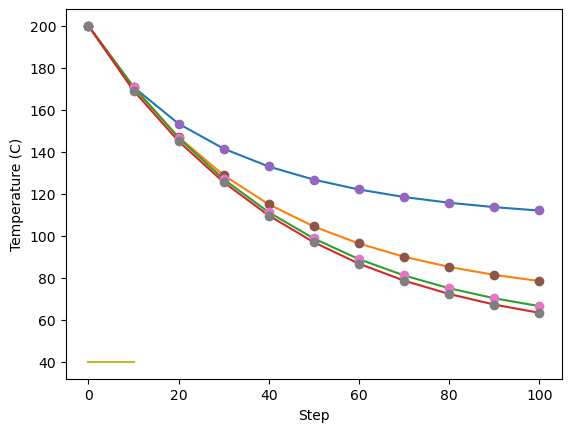

In [17]:
plt.figure()
plt.plot(dfValidate.Time, dfValidate.T1, label="Node 1")
plt.plot(dfValidate.Time, dfValidate.T2, label="Node 2")
plt.plot(dfValidate.Time, dfValidate.T3, label="Node 3")
plt.plot(dfValidate.Time, dfValidate.T4, label="Node 4")
plt.plot(dfValidate.Time, dfValidate.NodeCalc1, marker='o', linestyle='None')
plt.plot(dfValidate.Time, dfValidate.NodeCalc2, marker='o', linestyle='None')
plt.plot(dfValidate.Time, dfValidate.NodeCalc3, marker='o', linestyle='None')
plt.plot(dfValidate.Time, dfValidate.NodeCalc4, marker='o', linestyle='None')

plt.plot(dfValidate.step, np.ones(np.shape(dfValidate.step))*40, label="Fluid")
plt.xlabel("Step")
plt.ylabel("Temperature (C)")
plt.show()

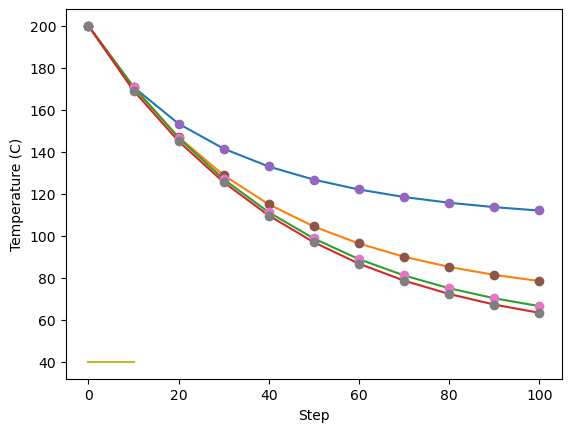

In [10]:
plt.figure()
plt.plot(dfValidate.Time, dfValidate.T1, label="Node 1")
plt.plot(dfValidate.Time, dfValidate.T2, label="Node 2")
plt.plot(dfValidate.Time, dfValidate.T3, label="Node 3")
plt.plot(dfValidate.Time, dfValidate.T4, label="Node 4")
plt.plot(dfValidate.Time, dfValidate["NodeCalc1"], marker='o', linestyle='None')
plt.plot(dfValidate.Time, dfValidate["NodeCalc2"], marker='o', linestyle='None')
plt.plot(dfValidate.Time, dfValidate["NodeCalc3"], marker='o', linestyle='None')
plt.plot(dfValidate.Time, dfValidate["NodeCalc4"], marker='o', linestyle='None')

plt.plot(dfValidate.step, np.ones(np.shape(dfValidate.step))*40, label="Fluid")
plt.xlabel("Step")
plt.ylabel("Temperature (C)")
plt.show()